
# Intro
This dataset is about the performance of an online retail in the year. With the information provided, the company hopes that their data analyst can evaluate their company's performance. Besides, they want to receive some uncovered insights about the customers and personal recommendations on fostering business growth

With all of these requirements, I can analyize with 2 presumped requirements:
1. Describe the portraits of customers by demographic, geographical and behavorial factors
2. Segment customers into different groups by buying behavior, to plan different marketing strategy for these groups of customers


In [1]:
import os # to improve performance, reduce overhead, 
# and enhance flexibility in the context of cloud computing and virtualization.
import warnings # to issue and catch warnings 
# that occur when certain conditions or unexpected situations arise.
warnings.filterwarnings('ignore') # in this case to ignore the warnings. 

import datetime 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from matplotlib.ticker import FuncFormatter

# the library below is used for Kmeans clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import calendar

In [2]:
file_path = "D:/Database_Source_File/Online Retail.xlsx"
data = pd.read_excel(file_path)



In [3]:
data.head(5).sort_values(by='InvoiceDate', ascending= False)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 1. EDA(Exploratory Data Analytics)



Before we deal with the company requirements, we need to have an overview of the dataset and clean it for out analysis later on. By doing this, we will understand the data better and also help prevent some bias or illogical insights.

###  Overview and Cleaning

In [4]:
data.info()
\
print("The size of the data: {}".format(data.shape));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
The size of the data: (541909, 8)


In [5]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [6]:
x= data[data['Quantity'] <= 0]['Quantity'].count()
y= data[data['UnitPrice'] <= 0]['UnitPrice'].count()
print("Negative quantity count: {}".format(x))
print("Negative unitprice count: {}".format(y))

Negative quantity count: 10624
Negative unitprice count: 2517


* I notice that there are negative values in Quantity and UnitPrice columns, affecting the results of Revenue column. There maybe a typo errors so I will assume that the stakeholders let me process by transforming negative values in Quantity, UnitPrice into positive ones, and delete rows with 0 value in UnitPrice and Quantity columns (If exist)
* Because this data set time range started from 2010-12-01 and ended 2011-12-09, it may be bias if we conclude 9 days of December 2011 in analysis of a 1 year business period. Therefore, i will get rid of these dates from the dataset

In [7]:
data['Quantity'] = data['Quantity'].abs()
data['UnitPrice'] = data['UnitPrice'].abs()
data['Revenue'] = data['Quantity'] * data['UnitPrice']

In [8]:
# Drop the rows which have Unitprice = 0 
data.drop(data[data['UnitPrice'] == 0].index, axis= 0, inplace= True)
data.drop(data[data['Quantity'] == 0].index, axis= 0, inplace= True)

In [9]:
data = data[data['InvoiceDate'] < '2011-12-01']

In [10]:
# Validate the dataset
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
count,513923.0,513923,513923,513923.000000,513923,513923.000000,389128.000000,513923,513923.000000
unique,22833.0,3935,4039,NaN,NaN,NaN,NaN,38,NaN
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,1114.0,2239,2302,NaN,NaN,NaN,NaN,469109,NaN
mean,NaN,NaN,NaN,10.639966,2011-06-27 01:18:47.098067200,4.687738,15287.134442,NaN,20.901388
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,NaN,0.001000
25%,NaN,NaN,NaN,1.000000,2011-03-22 14:43:00,1.250000,13952.000000,NaN,3.900000
50%,NaN,NaN,NaN,3.000000,2011-07-11 12:49:00,2.080000,15154.000000,NaN,9.900000
75%,NaN,NaN,NaN,10.000000,2011-10-10 11:54:00,4.130000,16788.000000,NaN,17.700000
max,NaN,NaN,NaN,74215.000000,2011-11-30 17:42:00,38970.000000,18287.000000,NaN,77183.600000


In [11]:
# find missing values
data.isna().sum()


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     124795
Country             0
Revenue             0
dtype: int64

* Not only can missing CustomerID values be problematic for later analysis but also unable to be removed without stakeholders' opinions. I will replace them with "No Record" values for the 'data' table, and create a new 'df' table under the assumption of removing these missing values 

In [12]:
# new dataset 'df' and now we will work with this only
df = data.dropna()
df.isna().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Revenue        0
dtype: int64

In [13]:
df.shape

(389128, 9)

In [14]:
# same old dataset 'data'
data['CustomerID'].fillna('No Record', inplace=True)
data['CustomerID'].isna().sum()

0

In [15]:
# check for some duplicated values
df.duplicated().sum()

4946

In [16]:
# check for some duplicated values
mask = df.duplicated(subset=None, keep=False)
df[mask].head(10).sort_values(by= ['StockCode'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2.95
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2.95
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95


In [17]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(384182, 9)

In [18]:
#  Identify outliers in Revenue column
df['z_score'] = stats.zscore(df['Revenue'])
outliers_detect = df[(df['z_score'] <= -3) | (df['z_score'] >= 3)]
outliers_detect.sort_values(by='z_score', ascending= True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,z_score
199413,561633,22699,ROSES REGENCY TEACUP AND SAUCER,261,2011-07-28 14:33:00,2.55,17949.0,United Kingdom,665.55,3.013709
191247,560586,21257,VICTORIAN SEWING BOX MEDIUM,96,2011-07-19 15:48:00,6.95,13631.0,United Kingdom,667.20,3.021447
21769,539101,22779,WOODEN OWLS LIGHT GARLAND,200,2010-12-16 10:35:00,3.37,16029.0,United Kingdom,674.00,3.053336
21768,539101,22780,LIGHT GARLAND BUTTERFILES PINK,200,2010-12-16 10:35:00,3.37,16029.0,United Kingdom,674.00,3.053336
35735,541220,22429,ENAMEL MEASURING JUG CREAM,180,2011-01-14 14:11:00,3.75,14156.0,EIRE,675.00,3.058026
...,...,...,...,...,...,...,...,...,...,...
312771,C573079,M,Manual,2,2011-10-27 14:15:00,4161.06,12536.0,France,8322.12,38.919985
157392,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00,182.646386
157393,C556445,M,Manual,1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,38970.00,182.646386
37510,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,77183.60,361.853012


* Take a look at outliers table, I see that there are some transactions with C letter in the front of InvoiceNo column, and they look like duplicates and have a typo error in InvoiceNo. They may be automatic orders ( with the same quantity, price,... ) established between sellers and buyers. Additionally, 4 last transactions according to outliers table seem suspicious, better ask stakeholders about that. 
* Cant remove these outliers without knowing the story about them, but for this dataset, I will assumpt that all invoices starting with "C" should be removed

In [19]:
#remove some suspicious invoice
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df.shape

(375666, 10)

In [20]:
#Validate the dataset
df_unfiltered = df[df['InvoiceNo'].astype(str).str.startswith('C')]
df_unfiltered.shape

(0, 10)

# 2. Customer Portraits

* After cleaning the data to make prevent any bias and analysis errors, I will proceed on the 1st requirement "Describe the customer portraits"

In [21]:
#Take a look again with our dataset 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,z_score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,-0.035706
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,-0.012070
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,-0.004285
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,-0.012070
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,-0.012070
...,...,...,...,...,...,...,...,...,...,...
384162,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,5.00,-0.084008
384163,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,11.90,-0.051650
384164,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,12.48,-0.048930
384165,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,7.95,-0.070174


## 2.1 By geographical features

In [22]:
# portrait the customers by geographical features
# Revenue from top 10 country
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending= False).head(10).map('{:,.1f}'.format)
revenue_by_country


Country
United Kingdom    6,813,642.8
Netherlands         273,718.3
EIRE                258,283.5
Germany             220,694.2
France              201,657.4
Australia           138,453.8
Spain                61,242.3
Switzerland          56,443.9
Belgium              39,778.6
Sweden               38,129.8
Name: Revenue, dtype: object

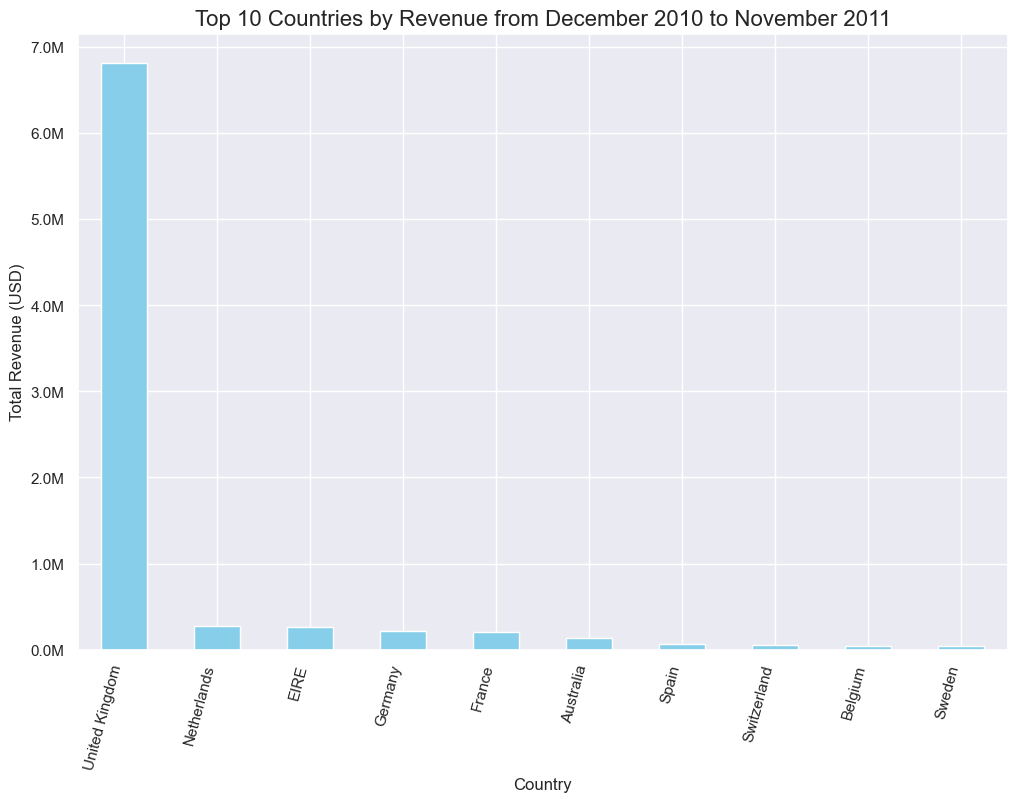

In [23]:
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending= False).head(10)

fig, ax = plt.subplots(figsize= (12,8))

# Plotting the bars
revenue_by_country.plot(kind='bar', x='Country', y='Revenue', ax=ax, color='skyblue')

# Adding labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Total Revenue (USD)')
ax.set_title('Top 10 Countries by Revenue from December 2010 to November 2011', fontsize= 16)

# Rotating x-axis labels for better readability
ax.set_xticklabels(revenue_by_country.index, rotation=75, ha='right')

def format_millions(x, pos):
    return f'{x / 1e6:.1f}M'

# Format y-axis labels to display in full numeric form
ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

# Display the chart
plt.show()

In [24]:
#Total of customers of top 10 country
total_customers_by_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending= False).head(10)
total_customers_by_country

Country
United Kingdom    3886
Germany             93
France              86
Spain               29
Belgium             25
Switzerland         21
Portugal            19
Italy               14
Finland             11
Austria             11
Name: CustomerID, dtype: int64

In [25]:
 df['Country'].value_counts(normalize = True) * 100

Country
United Kingdom          88.823583
Germany                  2.318017
France                   2.130084
EIRE                     1.838601
Spain                    0.642592
Netherlands              0.605059
Belgium                  0.515618
Switzerland              0.490063
Portugal                 0.359894
Australia                0.314375
Norway                   0.265662
Italy                    0.199645
Channel Islands          0.197516
Finland                  0.178882
Cyprus                   0.160515
Sweden                   0.119521
Austria                  0.104082
Denmark                  0.098226
Poland                   0.087844
Japan                    0.085448
Israel                   0.065218
Unspecified              0.064153
Singapore                0.059095
Iceland                  0.045519
Canada                   0.040195
USA                      0.039131
Malta                    0.029814
Greece                   0.029015
United Arab Emirates     0.018101
Europe

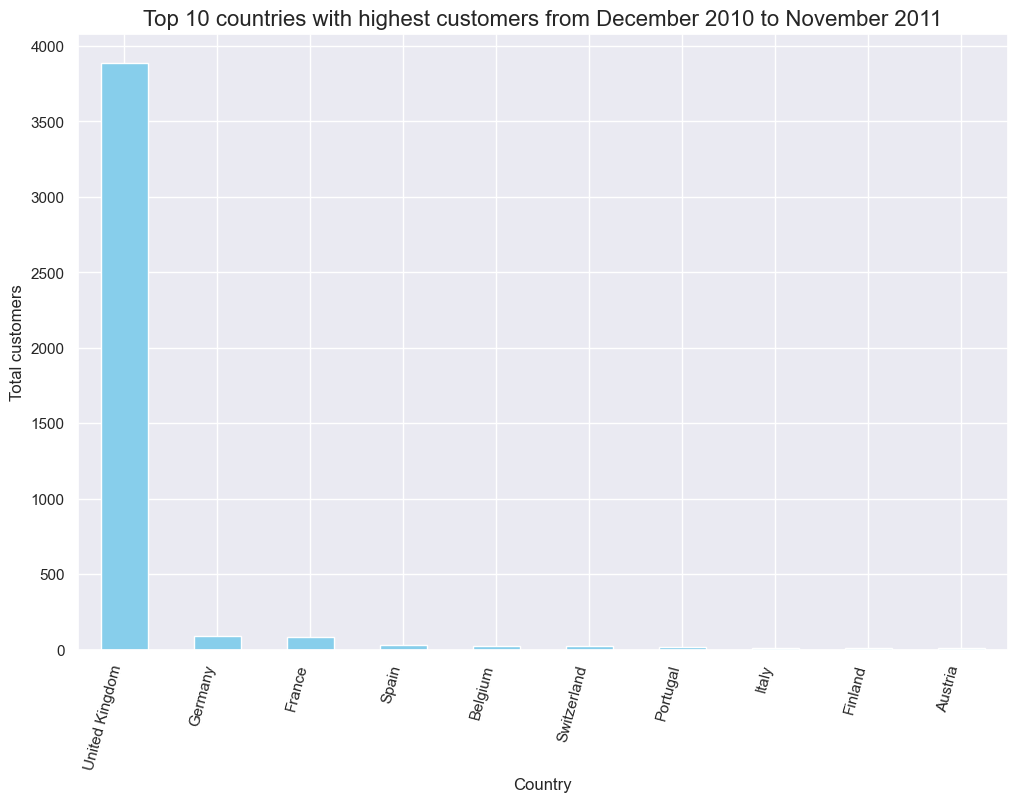

In [26]:
fig, ax = plt.subplots(figsize= (12,8))

# Plotting the bars
total_customers_by_country.plot(kind='bar', ax=ax, color='skyblue')

# Adding labels and title'2010-12-01'
ax.set_xlabel('Country')
ax.set_ylabel('Total customers')
ax.set_title('Top 10 countries with highest customers from December 2010 to November 2011', fontsize= 16)

# Rotating x-axis labels for better readability
ax.set_xticklabels(total_customers_by_country.index, rotation=75, ha='right')

# Display the chart
plt.show()

I can see that UK is the most sucessful market, with highest sales and customers. In further marketing campaign we should focus on this market. 

## 2.2. Demographic features

* Unfortunately, from the dataset given, there is not feasible columns for finding demographic patterns of customers. But I will still list this part here as a reminder of problems we need to cover when we portraits our clients


## 2.3 Behavourial features

In [27]:
#Monthly orders ratio
df['Month'] = df['InvoiceDate'].dt.month
df['Month'] = df['Month'].map(lambda x: calendar.month_name[x])
df['Month'].value_counts(normalize= True)*100



Month
November     16.814937
October      12.988399
September    10.559646
May           7.472862
June          7.167537
March         7.152630
August        7.131335
July          7.075434
December      6.833198
April         5.971528
January       5.586878
February      5.245617
Name: proportion, dtype: float64

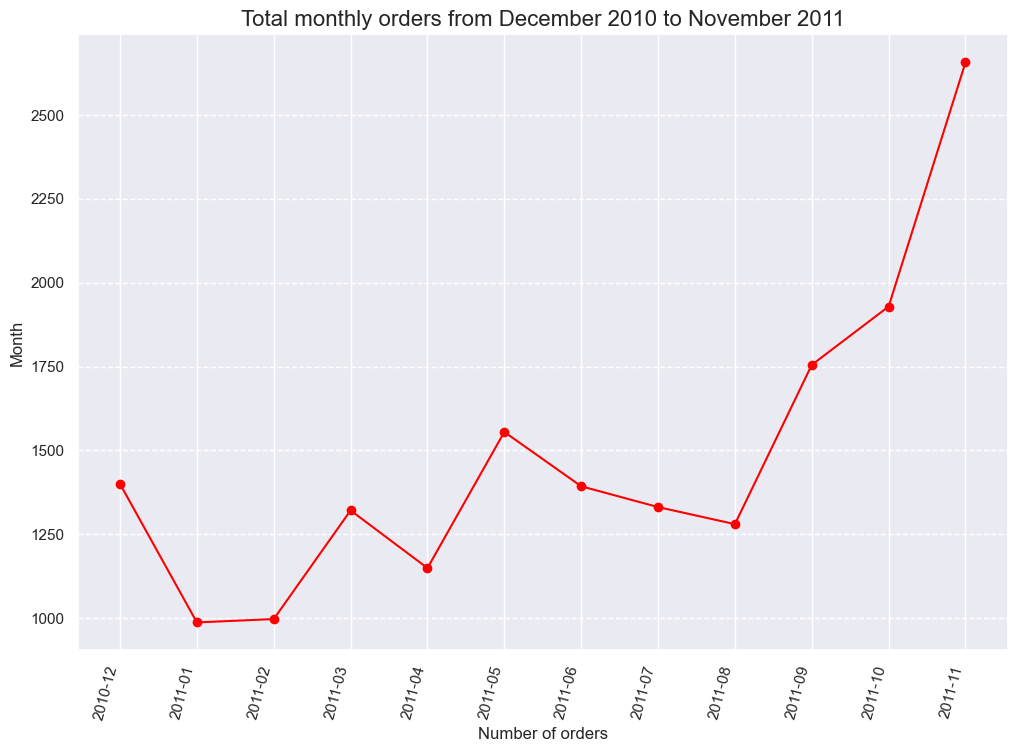

In [28]:
#Display number of orders by months 
df['Month'] = df['InvoiceDate'].dt.strftime('%Y-%m')
monthly_orders = df.groupby('Month')['InvoiceNo'].nunique()
monthly_orders

fig, ax= plt.subplots(figsize= (12,8))

#Display the line
monthly_orders.plot(kind= 'line', ax= ax, marker='o', color= 'red')

#Adding the name to label
ax.set_xlabel('Number of orders')
ax.set_ylabel('Month')
ax.set_title('Total monthly orders from December 2010 to November 2011', fontsize = 16)

# Rotating x-axis labels for better readability
ax.set_xticks(range(len(monthly_orders.index)))
ax.set_xticklabels(monthly_orders.index, rotation=75, ha='right')

# Add gridlines
ax.grid(axis='y', linestyle='--')

# Display the chart
plt.show()

In the period of 1 year, this retail tend to receive more orders around the end of the year.  


In [29]:
#Daily orders ratio
df['Day'] = df['InvoiceDate'].dt.strftime('%A')
orders_ratio_days = df['Day'].value_counts(normalize= True)*100
orders_ratio_days


Day
Thursday     19.864454
Wednesday    17.543509
Tuesday      16.834369
Monday       16.210144
Sunday       15.792486
Friday       13.755038
Name: proportion, dtype: float64

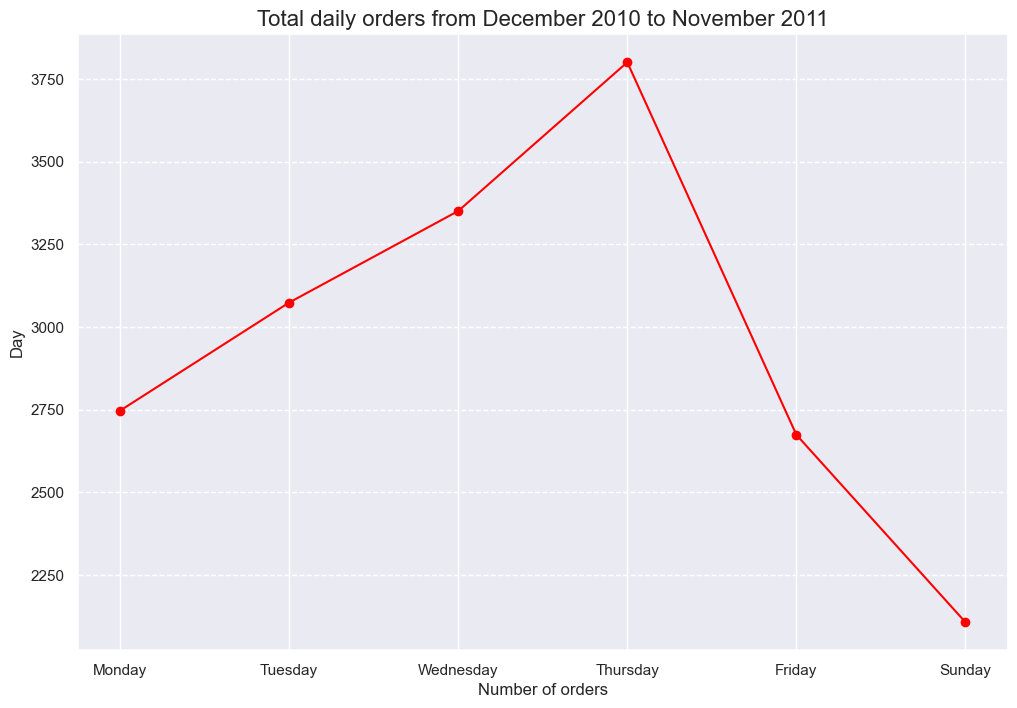

In [30]:
#Display average number of orders by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
orders_count_days = df.groupby('Day')['InvoiceNo'].nunique().loc[day_order]
orders_count_days

fig, ax= plt.subplots(figsize= (12,8))

#Display the line
orders_count_days.plot(kind= 'line', ax= ax, marker='o', color= 'red')
, 
#Adding the name to label
ax.set_xlabel('Number of orders')
ax.set_ylabel('Day')
ax.set_title('Total daily orders from December 2010 to November 2011', fontsize = 16)

# Add gridlines
ax.grid(axis='y', linestyle='--')

# Display the chart
plt.show()

* As I can see, Wednesday and Thursday are periods the company receive most orders. This is a customer trend of buying so the retailer should focus on stocking and logistics during these days.



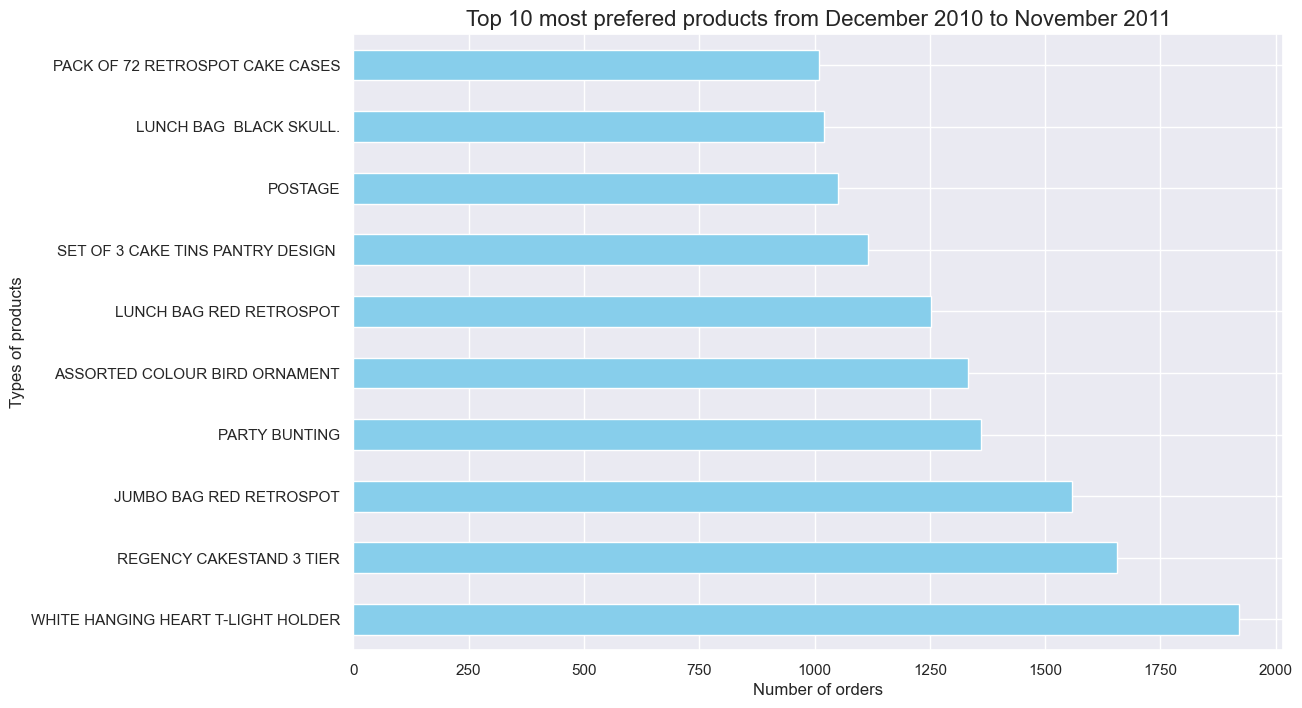

In [31]:
#Top 10 most prefered products 
top10_products = df.groupby('Description')['InvoiceNo'].nunique().sort_values(ascending= False).head(10)
top10_products

fig, ax= plt.subplots(figsize= (12,8))

# Plotting the bars
top10_products.plot(kind='barh', ax=ax, color='skyblue')

# Adding labels and title'2010-12-01'
ax.set_xlabel('Number of orders')
ax.set_ylabel('Types of products')
ax.set_title('Top 10 most prefered products from December 2010 to November 2011', fontsize= 16)

# Display the chart
plt.show()

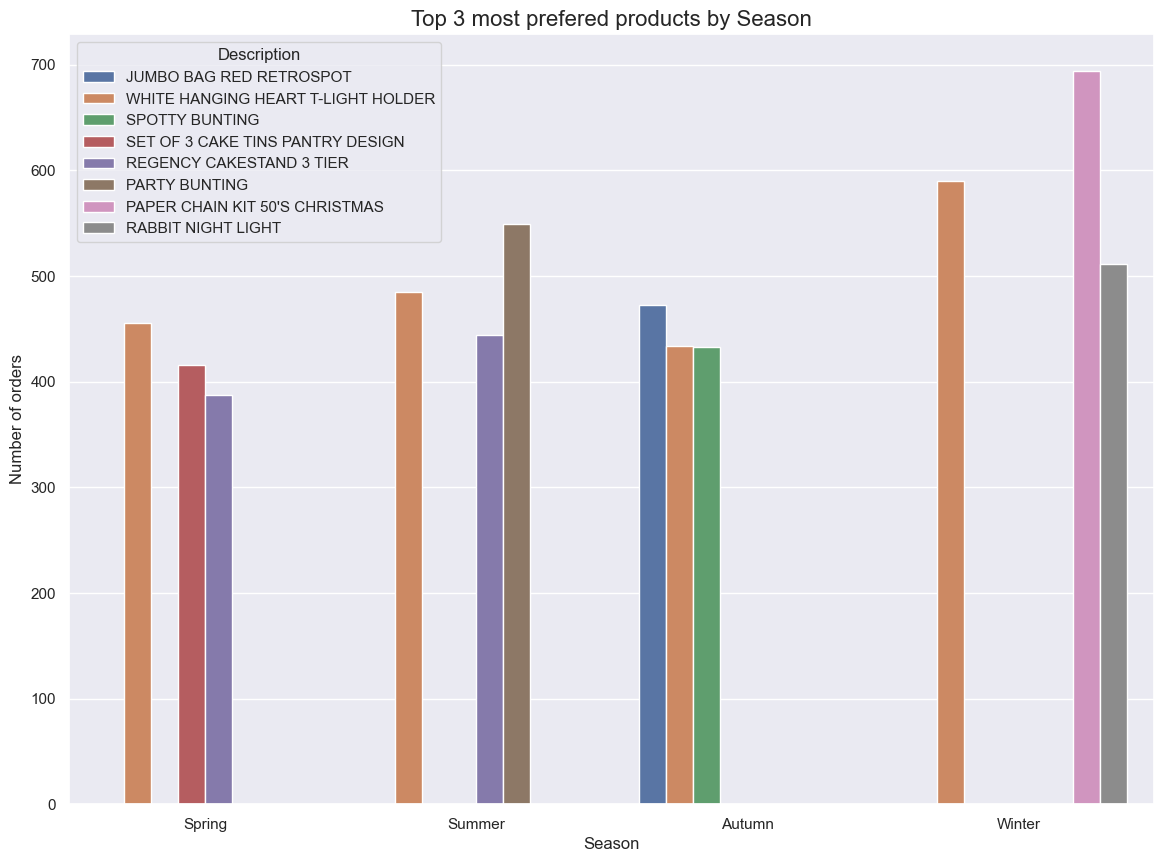

In [32]:
#Top 3 products by season 
season_mapping = {1:'Spring', 2:'Summer', 3:'Autumn', 4:'Winter'}
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['Season'] = df['Quarter'].replace(season_mapping)

season_product_count = df.groupby(['Season', 'Description'])['InvoiceNo'].count().reset_index()
top3_descriptions = season_product_count.sort_values(by=['Season', 'InvoiceNo'], ascending=[True, False]).groupby('Season').head(3)

# Plotting
plt.figure(figsize=(14, 10))
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
sns.barplot(x='Season', y='InvoiceNo', hue='Description', data=top3_descriptions, order=season_order)
plt.title('Top 3 most prefered products by Season', fontsize = 16)
plt.xlabel('Season')
plt.ylabel('Number of orders')
plt.show()

In [33]:
#Average order a day
avg_order_day = df['InvoiceNo'].nunique() / 365
print('Average orders of 1 day: {:.0f}'.format(avg_order_day))

Average orders of 1 day: 49


In [34]:
#Average order a month
avg_order_month = df['InvoiceNo'].nunique() / 12
print('Average orders of 1 month: {:.0f}'.format(avg_order_month))

Average orders of 1 month: 1480


In [35]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,z_score,Month,Day,Quarter,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,-0.035706,2010-12,Wednesday,4,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,-0.012070,2010-12,Wednesday,4,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,-0.004285,2010-12,Wednesday,4,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,-0.012070,2010-12,Wednesday,4,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,-0.012070,2010-12,Wednesday,4,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384162,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,5.00,-0.084008,2011-11,Wednesday,4,Winter
384163,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,11.90,-0.051650,2011-11,Wednesday,4,Winter
384164,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,12.48,-0.048930,2011-11,Wednesday,4,Winter
384165,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,7.95,-0.070174,2011-11,Wednesday,4,Winter


# 3. Customer segmentation 

## 3.1 Feature Engineering 

* We will use RFM (Recency - Frequency - Moneytary) model to find out the customers' behaviours to process customer segmentation with KMeans clustering later on. Besides demographic, psychographic, geographic, behavioural patterns is a suitable segmentation factor for this dataset. 

In [36]:
# Create a new dataset'customer_df' with 3 new attributes (Receny,Frequency,Moneytary)
# group by CustomerID
most_recent_date = df['InvoiceDate'].max()
customer_df= df.groupby('CustomerID').agg({'InvoiceDate': lambda x: 
                                           (most_recent_date - x.max()).days,
                                           'InvoiceNo': 'count',
                                           'Revenue': 'sum'}) # The lambda x is used within the .agg function to define a custom aggregation function.
customer_df.rename(columns=  {'InvoiceDate':'Recency',
                              'InvoiceNo':'Frequency',
                              'Revenue':'Monetary'}, inplace= True)
customer_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,1,77183.60
12347.0,30,171,4085.18
12348.0,66,31,1797.24
12349.0,9,73,1757.55
12350.0,301,17,334.40
...,...,...,...
18280.0,268,10,180.60
18281.0,171,7,80.82
18282.0,117,7,100.21


In [37]:
customer_df.describe()

,Recency,Frequency,Monetary
count,4297.000000,4297.00000,4297.000000
mean,90.460088,87.42518,1947.874902
std,98.574043,213.64727,8351.696003
min,0.000000,1.00000,2.900000
25%,15.000000,17.00000,303.160000
50%,49.000000,40.00000,650.750000
75%,145.000000,96.00000,1594.230000
max,364.000000,7212.00000,268478.000000


* The dataset is well-prepared for the next phase, but I want to take a look at the Description column to get an overall of the main products. If our main products are daily used types and middle price types, we will use all R-F-M values. On the other hand, if we sell mostly luxurious items, I will use Monetary and Frequency only. 

In [38]:
lvl_cnt = df['Description'][df['Quantity'] >=50][df['UnitPrice'] <=200].count()
print('Count of low-value items: {}'.format(lvl_cnt))
df['Description'][df['Quantity'] >=50][df['UnitPrice'] <=200].value_counts()


Count of low-value items: 12018


Description
JUMBO BAG RED RETROSPOT               220
PARTY BUNTING                         116
WHITE HANGING HEART T-LIGHT HOLDER    101
WORLD WAR 2 GLIDERS ASSTD DESIGNS     100
JUMBO BAG PINK POLKADOT                94
                                     ... 
SALLE DE BAIN HOOK                      1
POP ART PUSH DOWN RUBBER                1
TEATIME PUSH DOWN RUBBER                1
MADRAS NOTEBOOK LARGE                   1
GIN AND TONIC DIET METAL SIGN           1
Name: count, Length: 1709, dtype: int64

In [39]:
hvl_cnt = df['Description'][df['Quantity'] <= 30][df['UnitPrice'] >=200].count()
print('Count of high-value items: {}'.format(hvl_cnt))
df['Description'][df['Quantity'] <= 30][df['UnitPrice'] >= 200].value_counts()


Count of high-value items: 70


Description
Manual                            43
DOTCOM POSTAGE                    11
POSTAGE                            7
VINTAGE RED KITCHEN CABINET        5
VINTAGE BLUE KITCHEN CABINET       3
PICNIC BASKET WICKER 60 PIECES     1
Name: count, dtype: int64

#### Note: 

In ratio, the dataset points out that low-value items are main products. Addionally in high-value item list, there are some strange products such as postage and Dotcom postage, they may be not counted as store items and I will contact with the stakeholders about this.

## 3.2 KMeans Clustering Model


                                                  RMF Variables Distribution                                                  


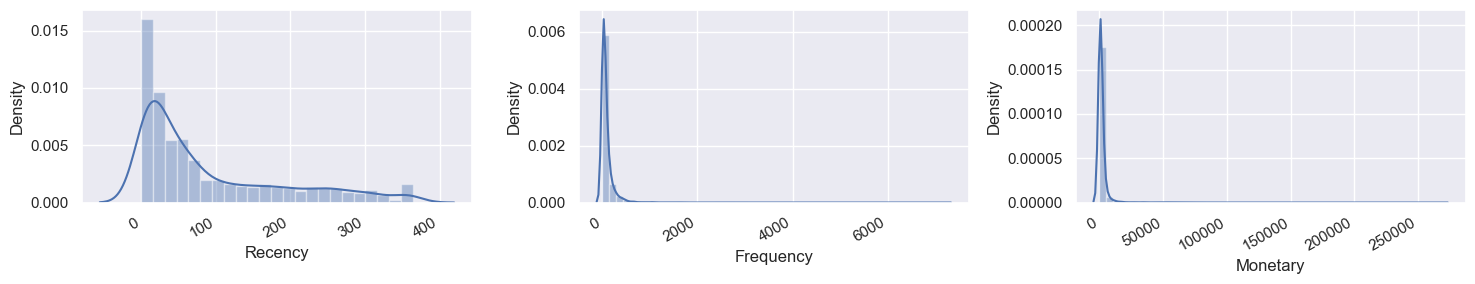

In [40]:
print('\033[1mRMF Variables Distribution'.center(130))
import math
n=3
nf = [i for i in customer_df.columns]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(customer_df[nf[c]])
    plt.xticks(rotation=30, horizontalalignment ='right')
plt.tight_layout()
plt.show()

In [41]:
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.yeojohnson(customer_df['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customer_df['Frequency'])[0]
customers_fix["Monetary"] = stats.boxcox(customer_df['Monetary'])[0]
customers_fix.head()

,Recency,Frequency,Monetary
0,9.816082,0.000000,7.527062
1,4.674428,5.865266,6.140720
2,6.157775,3.747348,5.693914
3,2.822575,4.786909,5.681363
4,9.686663,3.044333,4.685733


                                        RMF Variables Distribution After Normalization                                        


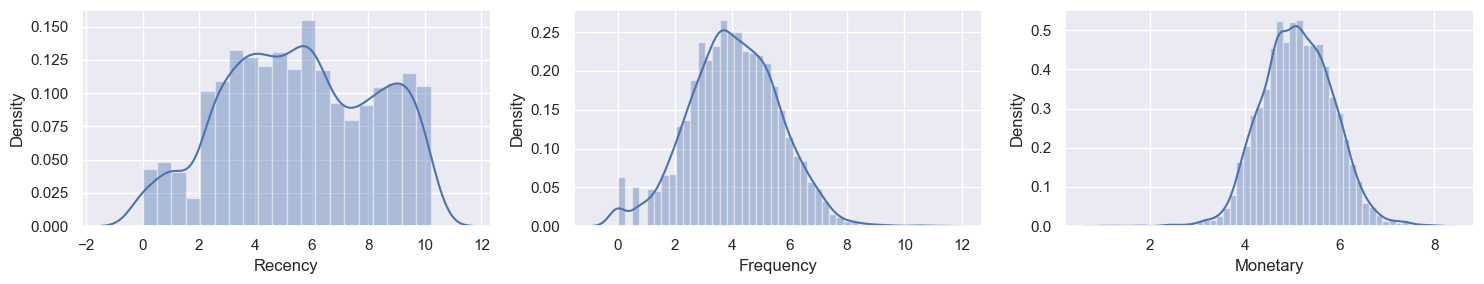

In [42]:
print('\033[1mRMF Variables Distribution After Normalization'.center(130))
n=3
nf = [i for i in customers_fix.columns]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(customers_fix[nf[c]])
plt.tight_layout()
plt.show()

In [43]:
#Applying Standardization
customers_standardized = StandardScaler().fit_transform(customers_fix)
customers_standardized

array([[ 1.60381528, -2.58678571,  3.21648243],
       [-0.34801235,  1.15511519,  1.36875298],
       [ 0.21508234, -0.19606664,  0.77324559],
       ...,
       [ 0.6785958 , -1.28275898, -1.6461941 ],
       [-2.12247618,  2.32337825,  0.78982386],
       [-0.28437594,  0.43398534,  0.78972221]])

In [44]:
!{sys.executable} -m pip install yellowbrick

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


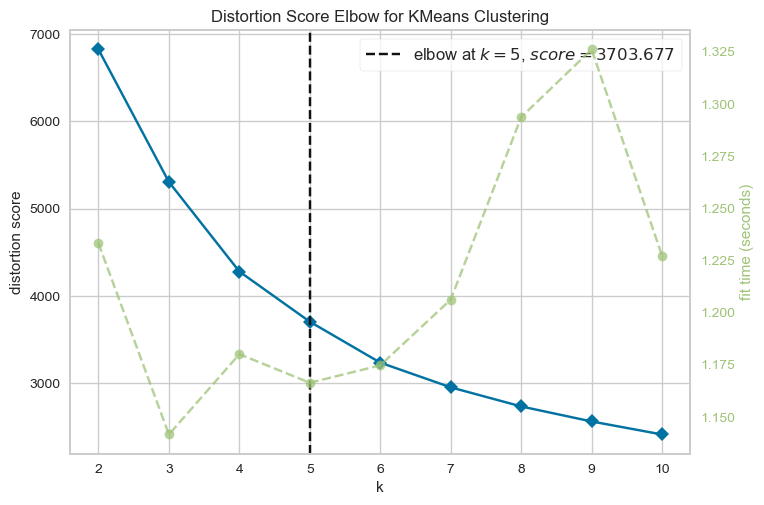

In [46]:
model = KMeans(random_state=42)
elb_visualizer = KElbowVisualizer(model, k=(2,11), timings= True)
elb_visualizer.fit(customers_standardized)    
elb_visualizer.show();

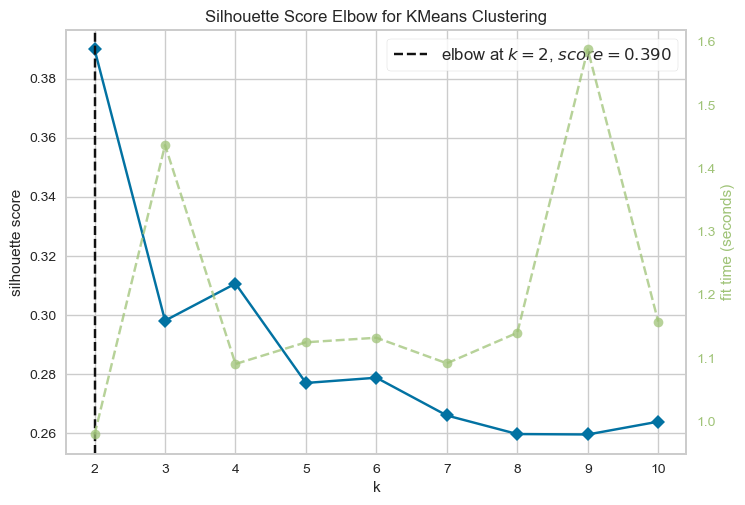

In [47]:
model = KMeans(random_state=42)
silhouetee_visualizer = KElbowVisualizer(model, k=(2,11),metric='silhouette', timings= True)
silhouetee_visualizer.fit(customers_standardized)        # Fit the data to the visualizer
silhouetee_visualizer.show();

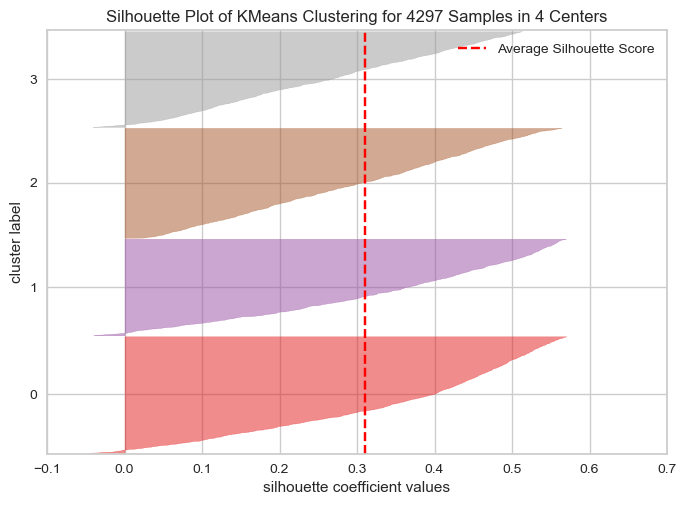

In [48]:
model_4clust = KMeans(n_clusters = 4, random_state=42)
sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(customers_standardized)    
sil_visualizer.show();

In [49]:
final_kmeans = KMeans(n_clusters=4,random_state=42)
final_kmeans.fit(customers_standardized)

KMeans(n_clusters=4, random_state=42)

In [50]:
final_df = pd.DataFrame(customers_fix, columns=customers_fix.columns, index=customers_fix.index)
final_df['Cluster'] = final_kmeans.labels_ + 1 # I want to have cluster labels starting from 1 instead of 0
final_df.head(10)

,Recency,Frequency,Monetary,Cluster
0,9.816082,0.000000,7.527062,3
1,4.674428,5.865266,6.140720,1
2,6.157775,3.747348,5.693914,3
3,2.822575,4.786909,5.681363,1
4,9.686663,3.044333,4.685733,2
5,4.492761,4.976351,5.878227,1
6,8.566145,1.435611,3.795040,2
7,8.912260,4.503322,5.401924,3
8,8.702156,2.737191,4.886260,2
9,3.336336,4.524286,5.940887,1


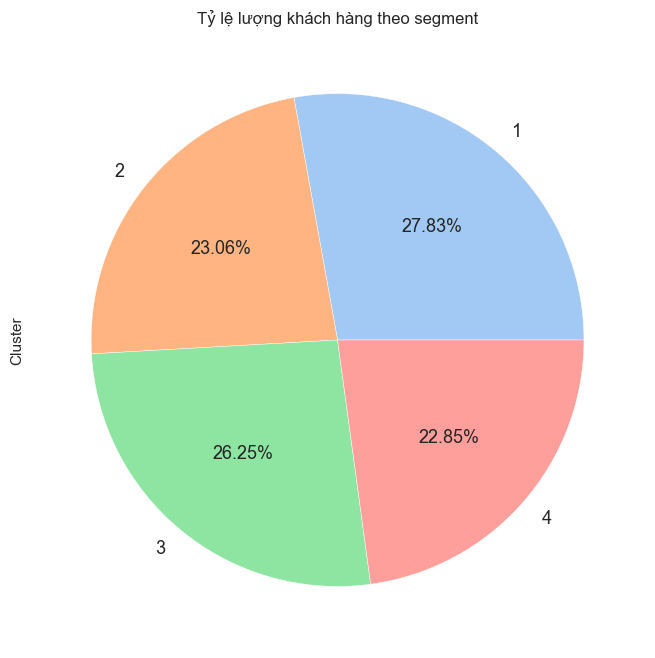

In [51]:
import random
num_slices = len(final_df)
color_palette = sns.color_palette("pastel", n_colors=num_slices)
random.shuffle(color_palette)

color_palette = sns.color_palette("pastel", n_colors=num_slices)
final_df.groupby('Cluster')['Cluster'].count().plot.pie\
(colors=color_palette, autopct = '%.2f%%', figsize = (8, 8), fontsize= 13)
plt.title('Tỷ lệ lượng khách hàng theo segment', fontsize= 12);

* As we can see, The proportions of 4 clusters are approximately equal. This mean we may have allocate our resources carefully 

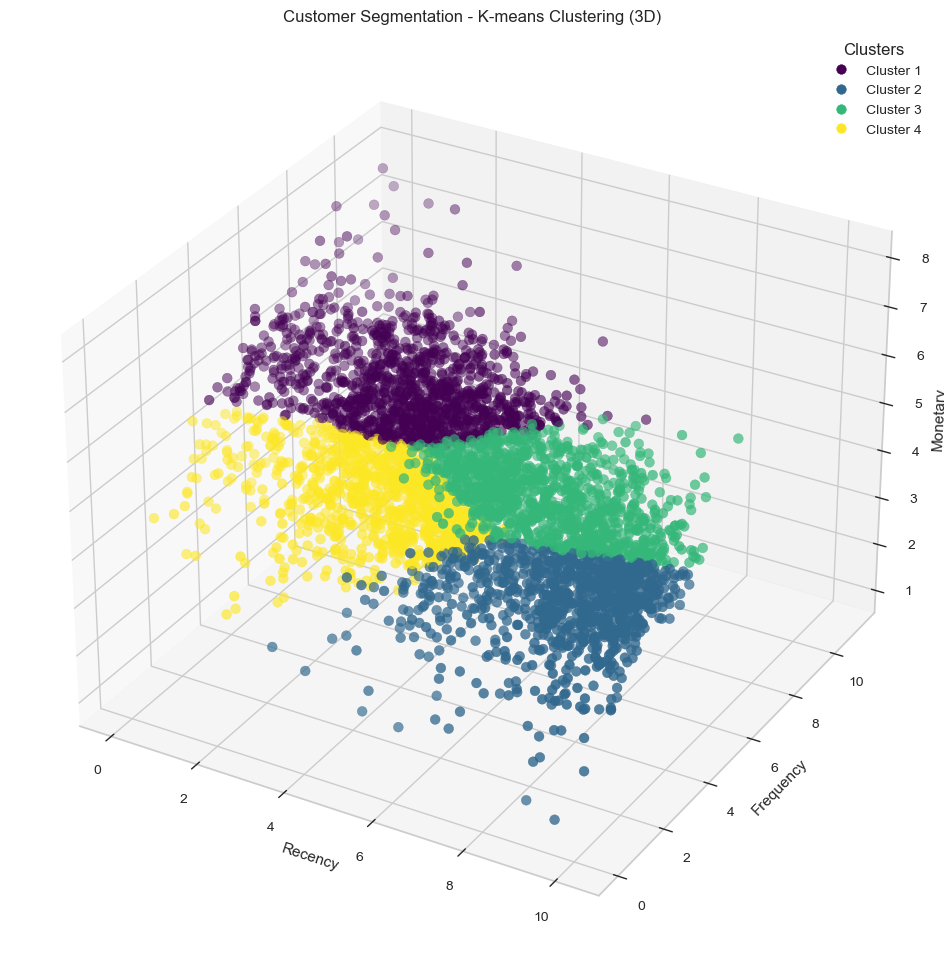

In [52]:
# Plotting the 3D scatter plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(final_df['Recency'], final_df['Frequency'], final_df['Monetary'], c=final_df['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Adding a legend
legend_labels = [f'Cluster {i}' for i in range(1,5)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.title('Customer Segmentation - K-means Clustering (3D)')
plt.show()

* On 3D visualizations, I can see that the clusters are seperated quite clearly. It could have been better if we just fit the model with the optimal K = 2 but that scenerio is not practical for a business if the business use that results to create and adjust the marketing strategies. Therefore, I will proceed my analysis with 4 clusters of customers

## 3.3 Customer Profiling 

In [53]:
final_df['r_quintile'] = pd.qcut(final_df['Recency'], 5, ['5','4','3','2','1'])
final_df['f_quintile'] = pd.qcut(final_df['Frequency'], 5, ['1','2','3','4','5'])
final_df['m_quintile'] = pd.qcut(final_df['Monetary'], 5, ['1','2','3','4','5'])
columns_convert = ['r_quintile', 'f_quintile', 'm_quintile']
final_df[columns_convert] = final_df[columns_convert].astype(int)
final_df.head()

,Recency,Frequency,Monetary,Cluster,r_quintile,f_quintile,m_quintile
0,9.816082,0.000000,7.527062,3,1,1,5
1,4.674428,5.865266,6.140720,1,4,5,5
2,6.157775,3.747348,5.693914,3,3,3,4
3,2.822575,4.786909,5.681363,1,5,4,4
4,9.686663,3.044333,4.685733,2,1,2,2


In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4297 entries, 0 to 4296
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     4297 non-null   float64
 1   Frequency   4297 non-null   float64
 2   Monetary    4297 non-null   float64
 3   Cluster     4297 non-null   int32  
 4   r_quintile  4297 non-null   int32  
 5   f_quintile  4297 non-null   int32  
 6   m_quintile  4297 non-null   int32  
dtypes: float64(3), int32(4)
memory usage: 168.0 KB


In [55]:
final_df['fm_score'] = (final_df['m_quintile'] + final_df['f_quintile']) / 2
final_df['RFM_Score'] = final_df.r_quintile.astype(str)+ final_df.f_quintile.astype(str) + final_df.m_quintile.astype(str)
final_df['Customer Seg'] = 'r'
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4297 entries, 0 to 4296
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       4297 non-null   float64
 1   Frequency     4297 non-null   float64
 2   Monetary      4297 non-null   float64
 3   Cluster       4297 non-null   int32  
 4   r_quintile    4297 non-null   int32  
 5   f_quintile    4297 non-null   int32  
 6   m_quintile    4297 non-null   int32  
 7   fm_score      4297 non-null   float64
 8   RFM_Score     4297 non-null   object 
 9   Customer Seg  4297 non-null   object 
dtypes: float64(4), int32(4), object(2)
memory usage: 268.7+ KB


In [56]:
def round_fm(float_number):
    decimal_part = float_number - int(float_number)
    if decimal_part >= 0.5:
        return math.ceil(float_number)
    else:
        return math.floor(float_number)
final_df['fm_score'] = final_df['fm_score'].apply(round_fm)
final_df


,Recency,Frequency,Monetary,Cluster,r_quintile,f_quintile,m_quintile,fm_score,RFM_Score,Customer Seg
0,9.816082,0.000000,7.527062,3,1,1,5,3,115,r
1,4.674428,5.865266,6.140720,1,4,5,5,5,455,r
2,6.157775,3.747348,5.693914,3,3,3,4,4,334,r
3,2.822575,4.786909,5.681363,1,5,4,4,4,544,r
4,9.686663,3.044333,4.685733,2,1,2,2,2,122,r
...,...,...,...,...,...,...,...,...,...,...
4292,9.382033,2.440772,4.282482,2,1,1,1,1,111,r
4293,8.259844,2.044005,3.726550,2,2,1,1,1,211,r
4294,7.378798,2.044005,3.878620,2,2,1,1,1,211,r
4295,0.000000,7.696468,5.706353,1,5,5,4,5,554,r


In [57]:
#Customer segment using R with combined F and M:
def customer_seg(row):
    rfm_score = row['RFM_Score']
    if rfm_score in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champion'
    elif rfm_score in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal Customers'
    elif rfm_score in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442',
                      '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341',
                       '333', '323', '535', '534', '443', '434', '343', '334', '325', '324']:
        return 'Potential Loyalist'
    elif rfm_score in ['512', '511', '422', '421', '412', '411', '311', '522', '521']:
        return 'Recent Customers'
    elif rfm_score in ['525', '524', '523', '515', '514', '513', '425', '424', '413',
                      '414', '415', '315', '314', '313']:
        return 'Promising'    
    elif rfm_score in ['331', '321', '312', '221', '213']:
        return 'About to Sleep'
    elif rfm_score in ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225',
                      '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124', 
                       '155', '154', '144', '214', '215', '115', '114', '113']:
        return 'Can`t lose them'
    elif rfm_score in ['332', '322', '231', '241', '251', '233', '232', '223', '222', '132', '123',
                      '122', '212', '211']:
        return 'Hibernating' 
    elif rfm_score in ['111', '112', '121', '131', '141', '151']:
        return 'Lost'
    else:
        return row['Customer Seg']
    
final_df['Customer Seg'] = final_df.apply(customer_seg, axis=1)
final_df['Customer Seg'].value_counts()

Customer Seg
Hibernating           814
Champion              797
Potential Loyalist    731
Can`t lose them       524
Lost                  420
Loyal Customers       389
Recent Customers      363
About to Sleep        161
Promising              98
Name: count, dtype: int64

In [58]:
final_df[final_df['Cluster']==1]['Customer Seg'].value_counts()

Customer Seg
Champion              797
Loyal Customers       267
Potential Loyalist    107
Can`t lose them        22
Promising               3
Name: count, dtype: int64

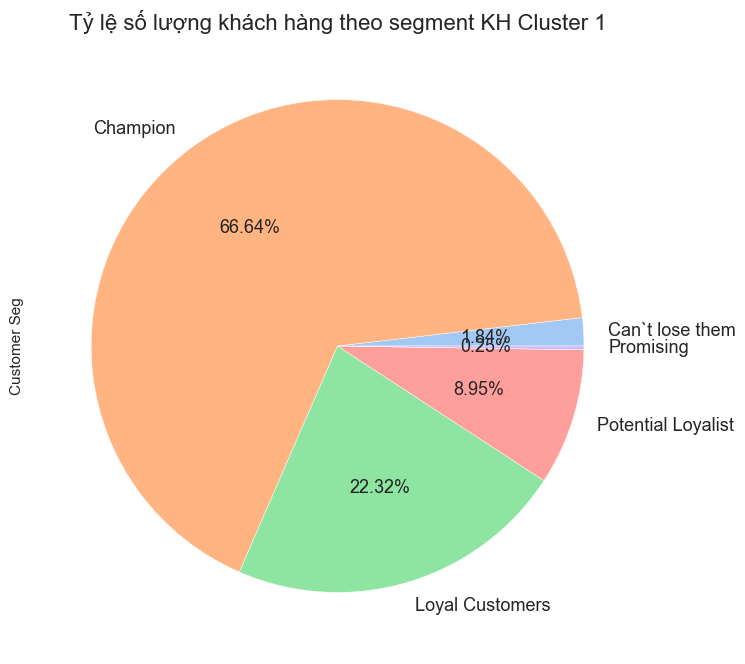

In [59]:
final_df[final_df['Cluster'] == 1].groupby('Customer Seg')['Customer Seg'].count().plot.pie\
(colors=color_palette, autopct = '%.2f%%', figsize = (8,8), fontsize=13)
plt.title('Tỷ lệ số lượng khách hàng theo segment KH Cluster 1', fontsize = 16);

* This cluster 1 will be label 'Champion' and 'Loyalists'

In [60]:
final_df[final_df['Cluster']==2]['Customer Seg'].value_counts()

Customer Seg
Lost                417
Hibernating         409
About to Sleep       73
Recent Customers     60
Can`t lose them      30
Promising             2
Name: count, dtype: int64

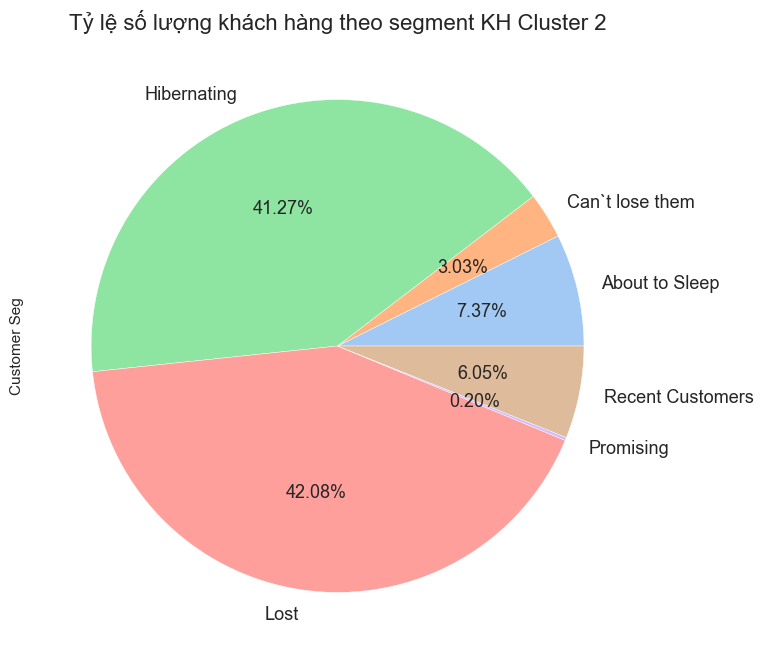

In [61]:
final_df[final_df['Cluster'] ==2].groupby('Customer Seg')['Customer Seg'].count().plot.pie\
(colors=color_palette, autopct = '%.2f%%', figsize = (8, 8), fontsize= 13)
plt.title('Tỷ lệ số lượng khách hàng theo segment KH Cluster 2', fontsize = 16);

* In this cluster 2, most Customers are in 'Hibernating' and 'Lost',  so i will label this cluster  'Hibernating or Lost'


In [62]:
final_df[final_df['Cluster']==3]['Customer Seg'].value_counts()

Customer Seg
Can`t lose them       472
Hibernating           285
Potential Loyalist    248
Loyal Customers       105
Promising               8
About to Sleep          7
Lost                    3
Name: count, dtype: int64

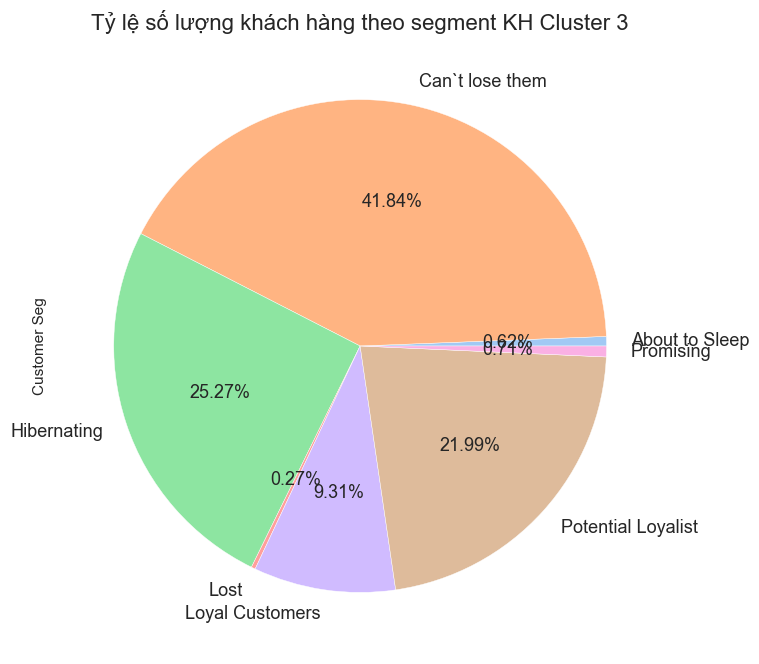

In [63]:
final_df[final_df['Cluster'] ==3].groupby('Customer Seg')['Customer Seg'].count().plot.pie\
(colors= color_palette, autopct = '%.2f%%', figsize = (8, 8), fontsize= 13)
plt.title('Tỷ lệ số lượng khách hàng theo segment KH Cluster 3', fontsize = 16);

* In this group, large fractions belong to 'Cant lost them', 'Hibernating' and 'Potential Loyalist'. It is noticeable that customers from this groups have not returned for a long time and their values contribution ranging medium to high. Therefore, I will label this group 'Cant lose them' and 'Needing attention' 

In [64]:
final_df[final_df['Cluster']== 4]['Customer Seg'].value_counts()

Customer Seg
Potential Loyalist    376
Recent Customers      303
Hibernating           120
Promising              85
About to Sleep         81
Loyal Customers        17
Name: count, dtype: int64

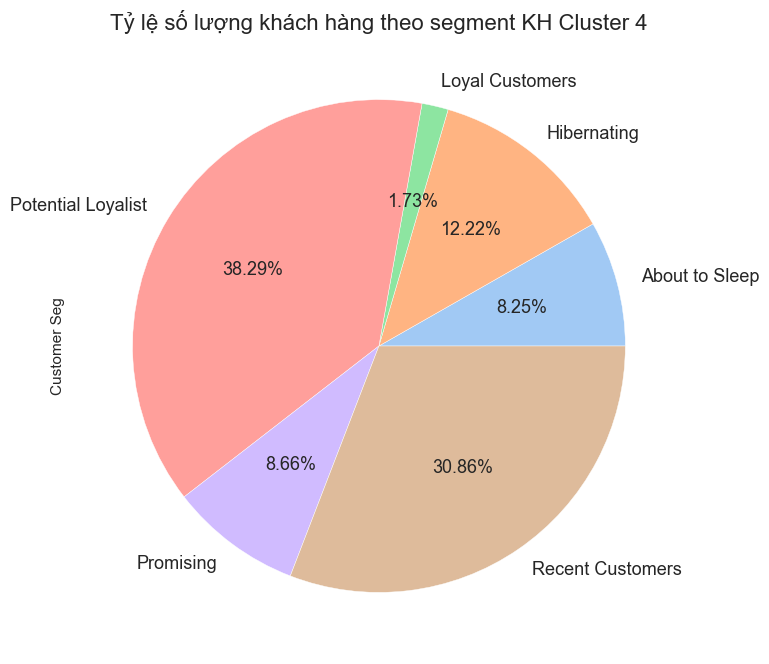

In [65]:
final_df[final_df['Cluster'] ==4].groupby('Customer Seg')['Customer Seg'].count().plot.pie\
(colors= color_palette, autopct = '%.2f%%', figsize = (8, 8), fontsize= 13)
plt.title('Tỷ lệ số lượng khách hàng theo segment KH Cluster 4', fontsize= 16);

* As we can see, most of the customer type in this cluster 4 is 'Potential Loyalist', 'Recent customers', 'Promising'. Most types of customers in this group have value contribution ranging from low to medium. I will call this cluster 'Recent and Potential Customers'


In [66]:
final_df.head()

,Recency,Frequency,Monetary,Cluster,r_quintile,f_quintile,m_quintile,fm_score,RFM_Score,Customer Seg
0,9.816082,0.000000,7.527062,3,1,1,5,3,115,Can`t lose them
1,4.674428,5.865266,6.140720,1,4,5,5,5,455,Champion
2,6.157775,3.747348,5.693914,3,3,3,4,4,334,Potential Loyalist
3,2.822575,4.786909,5.681363,1,5,4,4,4,544,Champion
4,9.686663,3.044333,4.685733,2,1,2,2,2,122,Hibernating


In [67]:
# Assgin the right profile of customer to the unscaled dataset for clearer insights
customer_df['Cluster'] = final_kmeans.labels_ + 1
customer_df

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,316,1,77183.60,3
12347.0,30,171,4085.18,1
12348.0,66,31,1797.24,3
12349.0,9,73,1757.55,1
12350.0,301,17,334.40,2
...,...,...,...,...
18280.0,268,10,180.60,2
18281.0,171,7,80.82,2
18282.0,117,7,100.21,2


In [68]:
def customer_profiling(row):
    cluster_type = row['Cluster']
    if cluster_type == 3:
        return 'Cant lose them and Needing attention'
    if cluster_type == 4:
        return 'Recent and Potential Customers'
    if cluster_type == 1:
        return 'Champions and Loyalists'
    else:
        return 'Hibernating or Lost'

customer_df['Customer type'] = customer_df.apply(customer_profiling, axis=1)
customer_df

,Recency,Frequency,Monetary,Cluster,Customer type
CustomerID,,,,,
12346.0,316,1,77183.60,3,Cant lose them and Needing attention
12347.0,30,171,4085.18,1,Champions and Loyalists
12348.0,66,31,1797.24,3,Cant lose them and Needing attention
12349.0,9,73,1757.55,1,Champions and Loyalists
12350.0,301,17,334.40,2,Hibernating or Lost
...,...,...,...,...,...
18280.0,268,10,180.60,2,Hibernating or Lost
18281.0,171,7,80.82,2,Hibernating or Lost
18282.0,117,7,100.21,2,Hibernating or Lost


In [69]:
customer_df.groupby('Customer type')[['Recency', 'Frequency', 'Monetary']].agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max']
})

Recency            Frequency      \
                                            mean min  max        mean min   
Customer type                                                               
Cant lose them and Needing attention  119.927305  22  364   58.991135   1   
Champions and Loyalists                17.363712   0  142  223.950669   8   
Hibernating or Lost                   210.350151  13  364   12.854692   1   
Recent and Potential Customers         24.648676   0   80   29.063136   1   

                                               Monetary                    
                                       max         mean     min       max  
Customer type                                                              
Cant lose them and Needing attention   326  1242.312484  179.93   77183.6  
Champions and Loyalists               7212  5242.994875  471.84  268478.0  
Hibernating or Lost                     66   246.192048    2.90    3096.0  
Recent and Potential Customers         128   462.415257   35.40    6748.8

# 4. Recap - Key insights
1. After dive into the dataset, I can portrait our target customers with some fetures as:\
a. Most of the company's customers (About 90%) came from United Kingdom and this area also contributed mostly to our total revenue.\
b. In the time period recorded, customers tend to buy more at the end of the year (September, October and December). Looking closer at the daily behaviours, customers tended to buy during weekdays, especially on Thursday.\
c. There are seasonal attributes with the products customers buy. Noticeably, there are some special products such as 'White Hanging Heart T-light Holder' being ordered all round the year.


2. The customers can be segmented into 4 groups based on their buying behaviour:\
a. 'Champions and Loyalists': Buy recently, high frequency of buying and high valued purchases\
b. 'Cant lose them and Needing attention' : Medium frequency of buying and having not bought recently. However, they contributed a lot to the company revenue\
c. 'Recent and Potential Customers': Buying recently, but their moneytary contribution was not much. These customers should be followed for a while\
d. 'Hibernating or Lost': This group has not been buying for a long time, and their moneytary contribution was very low.\
-> The company should stop trying to spend money on reengaging or doing promotion activities with 'Hibernating or Lost' group and pay more attention to the 'Cant lose them and Needing attention' and 'Recent Potential Customers'. By doing this, it can improve ROI and retention rate of the company
